### Introduction

In the following notebook, I will be exploring the listings data set to find potential relationships of interest.

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [8]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

#Set Visualization preferences
plt.style.use('bmh')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Write file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=0,
                parse_dates=['last_review'])

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 53)


,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
accommodates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",0,77,0,1,1.00,Real Bed,1.00,2.00,1,0.00,0.00,moderate,San Francisco,100.00,25.00,2,1.00,1169,1.00,1.00,Holly,100.00,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2019-03-16,37.77,-122.43,30,1,4200.00,Western Addition,183,170.00,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,100.00,1120.00,94117.00
2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.00,Real Bed,1.00,1.00,9,9.00,0.00,strict 14 with grace period,San Francisco,50.00,12.00,1,1.00,21994,1.00,0.00,Aaron,100.00,within a few hours,"email , phone , reviews , jumio , govern...",8142,0,1,2018-09-12,37.76,-122.45,90,32,1685.00,Haight Ashbury,8,65.00,Apartment,0,0,1,9.0,10.0,9.0,10.0,9.0,93.0,9.0,0.14,Private room,200.00,490.00,94117.00
5,"TV,Internet,Wifi,Kitchen,Heating, Family/kid ...",30,90,60,90,1.50,Real Bed,2.00,2.00,2,0.00,0.00,strict 14 with grace period,San Francisco,225.00,150.00,2,1.00,24215,1.00,0.00,Rosy,100.00,within an hour,"email , phone , reviews , kba",8339,0,1,2018-08-11,37.78,-122.44,1125,7,nan,Western Addition,27,785.00,House,1,1,1,10.0,10.0,10.0,10.0,10.0,97.0,9.0,0.23,Entire home/apt,0.00,nan,94117.00


**Variable Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126258 entries, 3 to 2
Data columns (total 53 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   amenities                                     126258 non-null  object        
 1   availability_30                               126258 non-null  int64         
 2   availability_365                              126258 non-null  int64         
 3   availability_60                               126258 non-null  int64         
 4   availability_90                               126258 non-null  int64         
 5   bathrooms                                     126258 non-null  float64       
 6   bed_type                                      126258 non-null  object        
 7   bedrooms                                      126258 non-null  float64       
 8   beds                                          126258 non-nu

**View data description**

In [6]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
availability_30,126258.00,9.53,10.50,0.00,0.00,5.00,17.00,30.00
availability_365,126258.00,143.07,126.02,0.00,25.00,107.00,263.00,365.00
availability_60,126258.00,22.90,21.05,0.00,1.00,18.00,41.00,60.00
availability_90,126258.00,38.27,31.69,0.00,5.00,35.00,66.00,90.00
bathrooms,126258.00,1.34,0.85,0.00,1.00,1.00,1.50,14.00
bedrooms,126258.00,1.35,0.92,0.00,1.00,1.00,2.00,14.00
beds,126258.00,1.77,1.21,0.00,1.00,1.00,2.00,16.00
calculated_host_listings_count,126258.00,11.64,37.52,1.00,1.00,2.00,4.00,301.00
calculated_host_listings_count_private_rooms,105994.00,2.73,7.32,0.00,0.00,0.00,2.00,87.00
calculated_host_listings_count_shared_rooms,105994.00,0.48,2.89,0.00,0.00,0.00,0.00,36.00


### Exploratory Data Analysis

#### Price

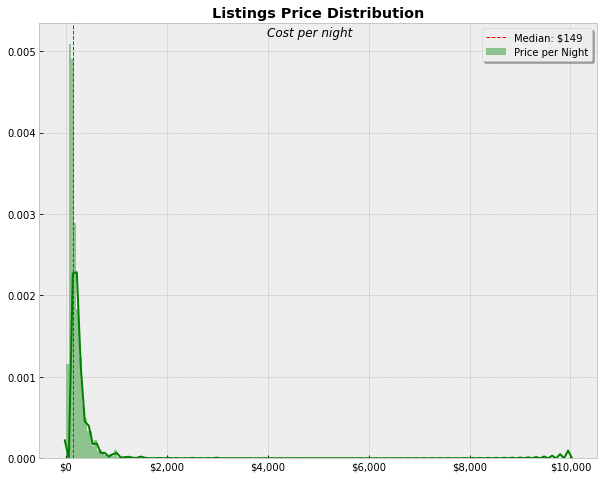

In [9]:
#Set figure
f, ax = plt.subplots(figsize = (10,8))

#Plot hist of price variable
j = sns.distplot(df.price, bins=200,ax = ax, color = 'green', label = 'Price per Night')

###Set Plot Aesthetics###
#Titles
j.set_title('Listings Price Distribution', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

#PLot price median
median = df.price.median()
plt.axvline(median, color='r', linestyle='--',linewidth = 1,label = 'Median: ${}'.format(round(median)))

#legend
plt.legend(shadow = True, frameon =True)

#Save to Visualizations file
plt.savefig(eda_path + '/price_hist.png', bbox_inches='tight')

Airbnb offers a service known as Airbnb Luxe which offers pristine, expertly designed homes with luxury amenities, services, and a dedicated trip designer. This would explain the extreme rental prices for a one night stay

#### Prices by time

**Prep data**

In [10]:
#Subset target with last_review date
time = df.loc[:,['last_review','price']]

#Extract time data from last_review
time['year'] = df['last_review'].dt.year
time['month']= df['last_review'].dt.month_name()
time['weekday']= df['last_review'].dt.day_name()

#Set last review as index
time.set_index('last_review', inplace = True)

#Check
time.head(15)

,price,year,month,weekday
last_review,,,,
2019-03-16,170.00,2019,March,Saturday
2018-09-12,65.00,2018,September,Wednesday
2018-08-11,785.00,2018,August,Saturday
2019-03-30,255.00,2019,March,Saturday
2019-03-23,139.00,2019,March,Saturday
2019-03-29,135.00,2019,March,Friday
2019-03-31,265.00,2019,March,Sunday
2018-12-01,177.00,2018,December,Saturday
2018-08-25,194.00,2018,August,Saturday


**Month**

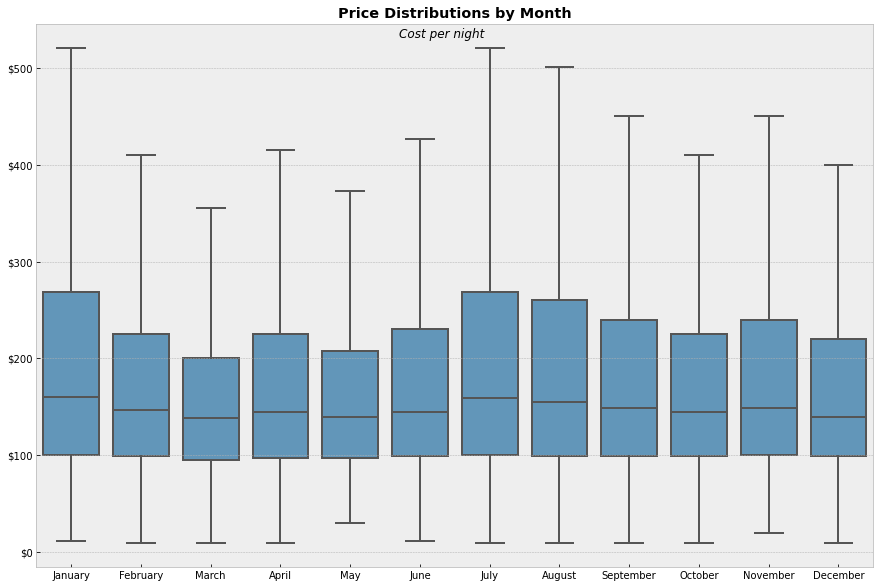

In [26]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'month', y = 'price',
                order = ['January', 'February', 'March' ,'April', 'May', 'June', 'July', 
                         'August' ,'September', 'October' ,'November', 'December'],color = '#5499C7',
                data = time, showfliers = False,ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Month', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/month_price_box.png', bbox_inches='tight')

**Weekday**

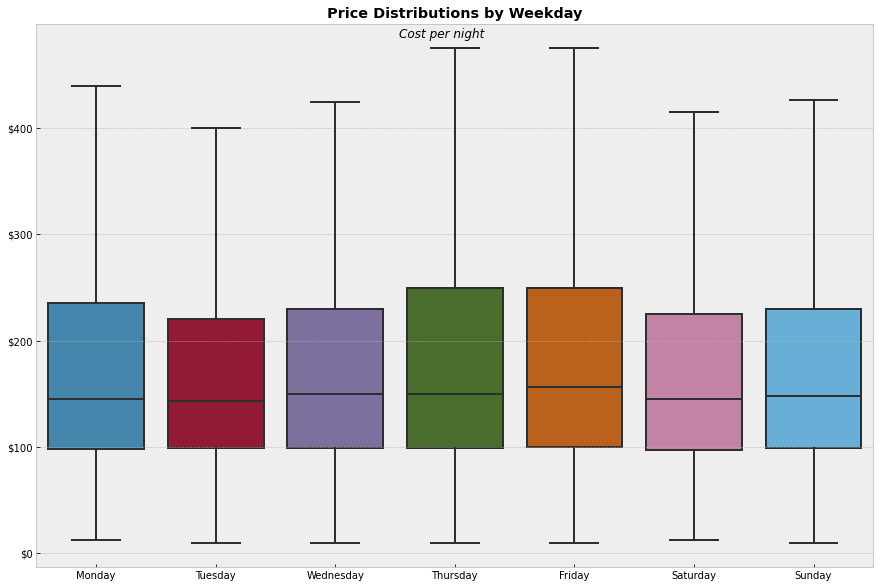

In [12]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'weekday', y = 'price', data =time, showfliers = False,
                order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'], ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Weekday', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/weekday_price_box.png', bbox_inches='tight')

# LOOK HERE !!!!!!!!!!

### Investigating Prices by neighborhood

In [13]:
neighbourhoods = pd.DataFrame()
#Assign average rent per night to geo data for plotting
neighbourhoods['avg_price']=df.groupby('neighbourhood_cleansed')['price'].mean()

#Check
display(neighbourhoods.head(10))

,avg_price
neighbourhood_cleansed,
Bayview,120.85
Bernal Heights,179.84
Castro/Upper Market,237.85
Chinatown,182.61
Crocker Amazon,125.07
Diamond Heights,214.65
Downtown/Civic Center,187.31
Excelsior,126.18
Financial District,180.72


### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [14]:
#Capture host_ids with the most listings
property_counts = df.groupby(['host_id','host_name'])['id'].count().sort_values(ascending=False).reset_index()

#Rename cols and add total_listings_rank
property_counts.rename(columns = {'id' : 'total_listings'}, inplace= True)
property_counts['total_listings_rank'] = np.arange(start = 1, stop = len(property_counts) + 1, step = 1)

#Group hosts by unique count of id's
unique_properties = df.groupby(['host_id','host_name'])['id'].nunique().sort_values(ascending = False).reset_index()

#Rename cols
unique_properties.rename(columns = {'id' : 'unique_listings'}, inplace= True)
unique_properties['unique_listings_rank'] = np.arange(start = 1, stop = len(unique_properties) + 1, step = 1)

#Merge unique_properties and property_counts
host_info = pd.merge(unique_properties, property_counts, left_on=['host_id', 'host_name'],right_on=['host_id', 'host_name'])
host_info.set_index('host_id', inplace = True)

#Check
host_info.head()

,host_name,unique_listings,unique_listings_rank,total_listings,total_listings_rank
host_id,,,,,
48005494,Zeus,155,1,1973,1
219930816,Sonder (San Francisco),107,2,847,3
4430421,Landmark,64,3,1037,2
64646820,Michelle,53,4,688,5
173206762,Stratford,50,5,554,11


**Which hosts are also Super Hosts?**

In [15]:
#Get list of hosts to capture superhost info about
hosts= host_info.index.tolist()

#Subset flags from main df and store as temp. Remove duplicates
temp = df[['host_id','host_is_superhost']].loc[(df.host_id.isin(hosts))].drop_duplicates()

#Group host_id's and apply sum to host_is_superhost. Superhosts will = 1
temp = temp.groupby('host_id')['host_is_superhost'].sum().reset_index().sort_values('host_is_superhost')

#Merge and set host_id as index
host_info = host_info.merge(temp, left_on='host_id', how='left',right_on='host_id')
host_info.set_index('host_id', inplace = True)

#Display
display(host_info.head(15))

,host_name,unique_listings,unique_listings_rank,total_listings,total_listings_rank,host_is_superhost
host_id,,,,,,
48005494,Zeus,155,1,1973,1,1.00
219930816,Sonder (San Francisco),107,2,847,3,0.00
4430421,Landmark,64,3,1037,2,0.00
64646820,Michelle,53,4,688,5,1.00
173206762,Stratford,50,5,554,11,0.00
17042045,The Bartlett,49,6,624,8,0.00
70722023,Michael,49,7,637,7,1.00
103340667,Sheena,44,8,609,9,0.00
117141107,Zarinah,43,9,782,4,1.00


- What kinds of properties are these and how do they compare to other hosts

4 of the top 5 hosts w/ most success on Airbnb are companies offering fully furnished apartments for rent in San Francisco

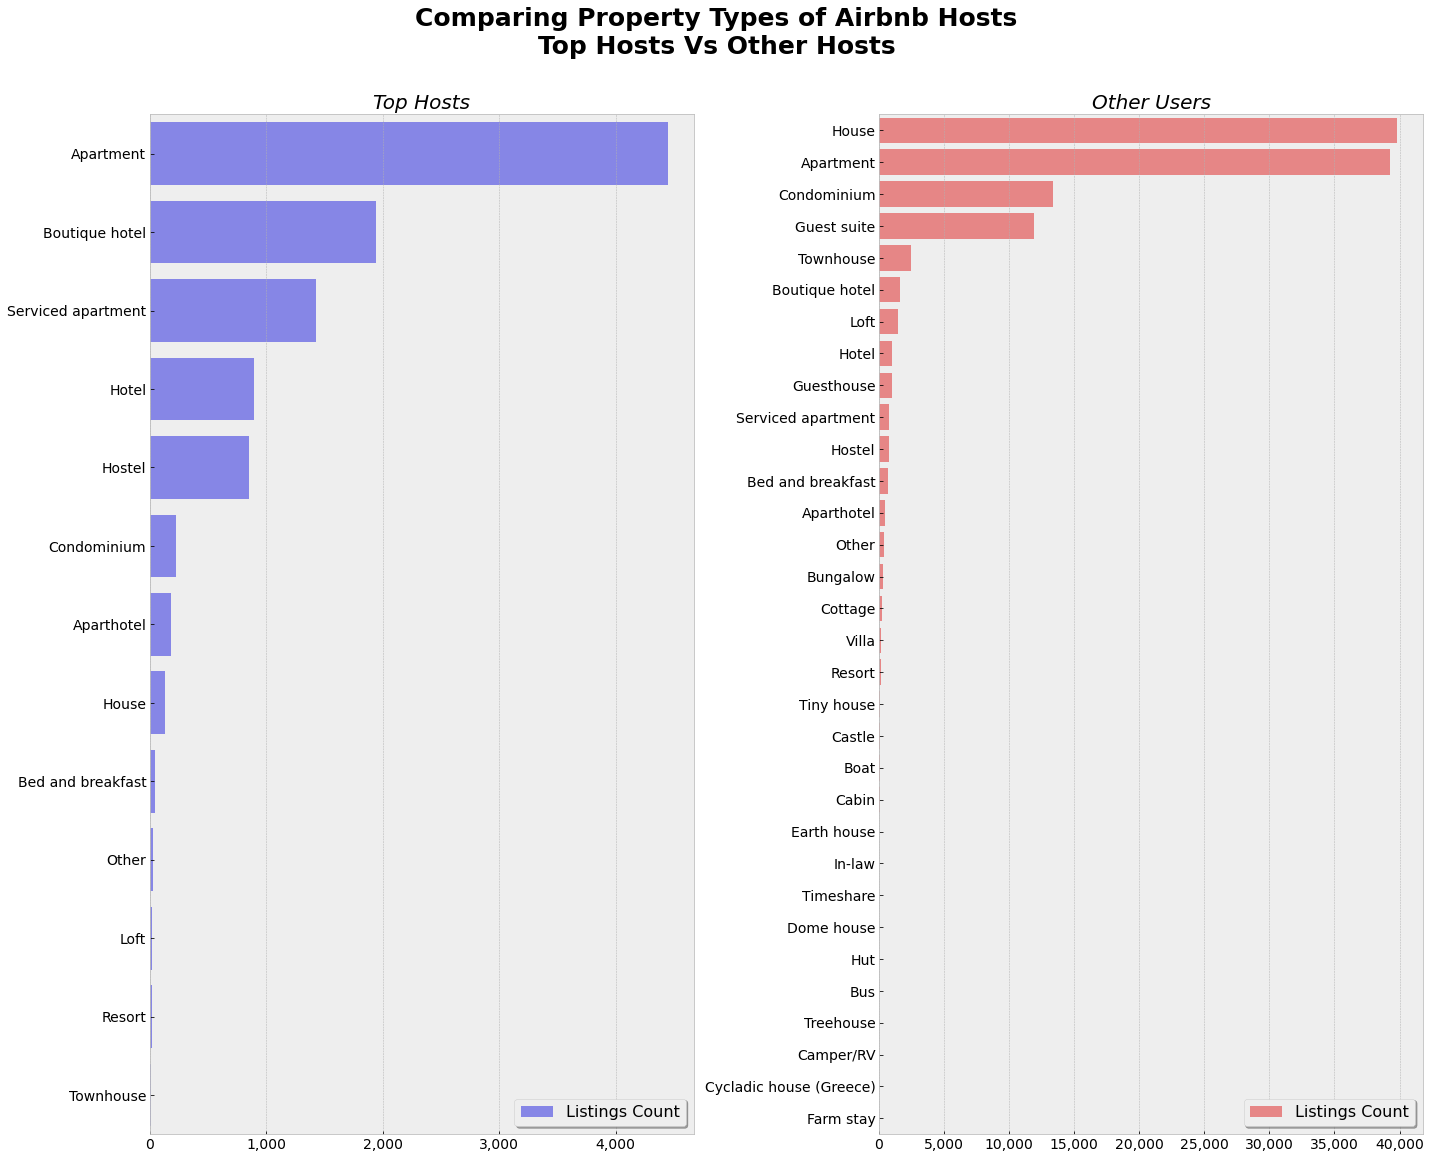

In [16]:
#Subsetting host_id's of the top 15
hosts = host_info[:15].index.tolist()

#Set figure
f, ax = plt.subplots(1,2, figsize = (20,15))

#Display kinds of properties available for rent
g =sns.countplot(y = 'property_type', order = df.property_type.loc[df.host_id.isin(hosts)].value_counts().index,
                 color='blue', alpha = .5,label = 'Listings Count',
              data = df.loc[df.host_id.isin(hosts)], ax = ax[0])

#Display kinds of properties of everyone else
j = sns.countplot(y = 'property_type', data = df.loc[~df.host_id.isin(hosts)],color='red', alpha = .5,label = 'Listings Count',
              order = df.property_type.loc[~df.host_id.isin(hosts)].value_counts().index,
              ax = ax[1])

###Set plot aesthetics###
#Title
plt.suptitle('Comparing Property Types of Airbnb Hosts\nTop Hosts Vs Other Hosts', y = 1.07, fontsize = 25, fontweight = 'semibold')

##Plot g##

#Title
g.set_title('Top Hosts',fontsize = 20, style = 'italic')

#Axes
g.set_xlabel('')
g.set_ylabel('')
g.tick_params(axis = 'both',labelsize = 14)
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


#Legend
g.legend(shadow = True, fontsize = 16, loc = 'lower right')

##Plot j##
#Title
j.set_title('Other Users',fontsize = 20, style = 'italic')

#Axes
j.set_xlabel('')
j.set_ylabel('')
j.tick_params(axis = 'both',labelsize = 14)
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
j.legend(shadow = True, fontsize = 16, loc = 'lower right')
f.tight_layout()

#Save to Visualizations file
plt.savefig(eda_path + '/property_comparisons.png', bbox_inches='tight')

### Comparing long-term rentals to local rent prices in San Francisco

**Prepare Data**

In [17]:
#Subset rows where monthly price is not na or minimum nights is >=28days
monthly_rent = df.loc[(df.minimum_nights >= 28)| ~(df.monthly_price.isna())]

#Fill missing monthly_price with price * minimum_nights
monthly_rent.monthly_price.fillna(monthly_rent.minimum_nights * monthly_rent.price, inplace = True)

#Check
display(monthly_rent.head(3))

C:\Users\kishe\Miniconda3\envs\Airbnb_Listings_Analysis\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
accommodates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",0,77,0,1,1.00,Real Bed,1.00,2.00,1,0.00,0.00,moderate,San Francisco,100.00,25.00,2,1.00,1169,1.00,1.00,Holly,100.00,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2019-03-16,37.77,-122.43,30,1,4200.00,Western Addition,183,170.00,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,100.00,1120.00,94117.00
2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.00,Real Bed,1.00,1.00,9,9.00,0.00,strict 14 with grace period,San Francisco,50.00,12.00,1,1.00,21994,1.00,0.00,Aaron,100.00,within a few hours,"email , phone , reviews , jumio , govern...",8142,0,1,2018-09-12,37.76,-122.45,90,32,1685.00,Haight Ashbury,8,65.00,Apartment,0,0,1,9.0,10.0,9.0,10.0,9.0,93.0,9.0,0.14,Private room,200.00,490.00,94117.00
3,"TV, Cable TV ,Internet,Wifi, Paid parking off...",4,131,19,42,1.00,Real Bed,1.00,2.00,2,2.00,0.00,strict 14 with grace period,San Francisco,50.00,60.00,2,1.00,7149,0.00,1.00,Ivan & Wendy,100.00,within an hour,"email , phone , reviews , kba , work ema...",8739,1,1,2019-03-23,37.76,-122.42,14,1,9999.00,Mission,656,139.00,Condominium,0,0,1,10.0,10.0,10.0,10.0,10.0,98.0,10.0,5.57,Private room,0.00,nan,94110.00


**Check price distribution w/ and w/o outliers

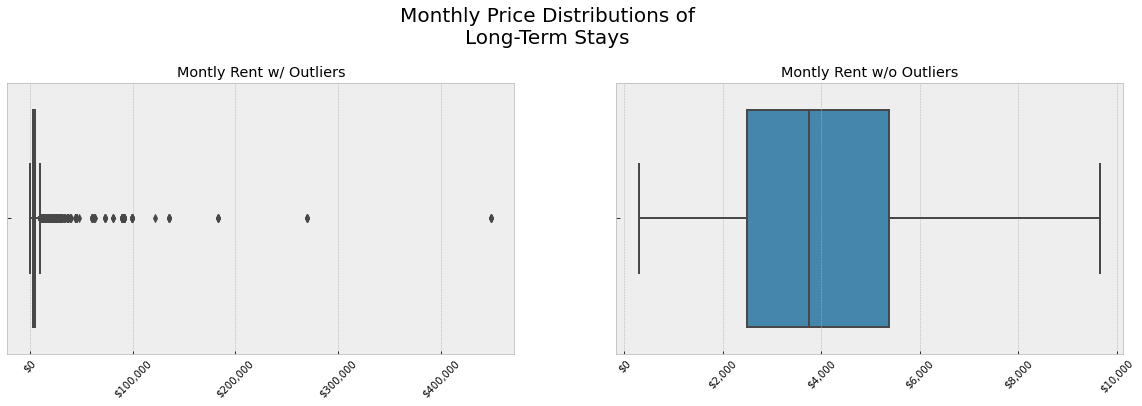

In [18]:
#Create figure
f, ax = plt.subplots(1,2,figsize = (20,5))

#Plot monthly prices, w/ and w/o outliers reflected
g = sns.boxplot(x = 'monthly_price', data = monthly_rent, showfliers = True, ax = ax[0])
j = sns.boxplot(x = 'monthly_price', data = monthly_rent, showfliers = False, ax = ax[1])

###Set plot aesthetics###
#Title
plt.suptitle('Monthly Price Distributions of\nLong-Term Stays', y = 1.09, fontsize = 20)

##Plot g##
#Title
g.set_title('Montly Rent w/ Outliers')

#Axes
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
g.tick_params(axis='x', rotation=45)
g.set_xlabel('')

##Plot j##
#Title
j.set_title('Montly Rent w/o Outliers')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.tick_params(axis='x', rotation=45)
j.set_xlabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/monthly_rent_box.png', bbox_inches='tight')

**Remove outliers from monthly_rent and prepare as time series**

In [19]:
###Using IQR to remove outliers###
#Calulate IQR 
q1, q3 = np.quantile(monthly_rent.monthly_price, (.25, .75))
IQR = q3 - q1

#Calculate threshold
lower, upper = (q1 - (IQR * 1.5)),(q3 + (IQR * 1.5))

#Drop outliers from monthly_rent
monthly_rent = monthly_rent.loc[monthly_rent.monthly_price < upper]

#Subset cols for time series
time_series = monthly_rent.filter(regex ='monthly_price|last')

#Extract month_year
time_series['month_year'] = time_series.last_review.dt.to_period('M')

#Groupby month_year and capture mean and median of monthly_price
time_series = time_series.groupby('month_year')['monthly_price'].agg(['median','mean'])

#Check 
time_series.head()

C:\Users\kishe\Miniconda3\envs\Airbnb_Listings_Analysis\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,median,mean
month_year,,
2018-07,3888.00,4256.00
2018-08,3675.00,3983.50
2018-09,3500.00,3777.42
2018-10,3630.00,3889.81
2018-11,3700.00,4016.77


### Comparing local renter's market to Airbnb long-term hosts

**Read in/prepare Zillow Data**

In [20]:
#Read in Zillow data
zillow = pd.read_csv(path + '/2020_0526_Zillow_Cleaned.csv', index_col=0, parse_dates=['month_year'])

#Subset infromation pertaining to San Francisco and store as sf_rent
sf_rent = zillow.loc[zillow.regionname.str.contains('San Fran')]

#Set month_year as index
sf_rent.set_index('month_year', inplace = True)

#Check
display(sf_rent.head())

,regionname,rent
month_year,,
2014-01-01,"San Francisco, CA",2043.00
2014-02-01,"San Francisco, CA",2101.00
2014-03-01,"San Francisco, CA",2105.00
2014-04-01,"San Francisco, CA",2121.00
2014-05-01,"San Francisco, CA",2191.00


**SF Rental Time plot**

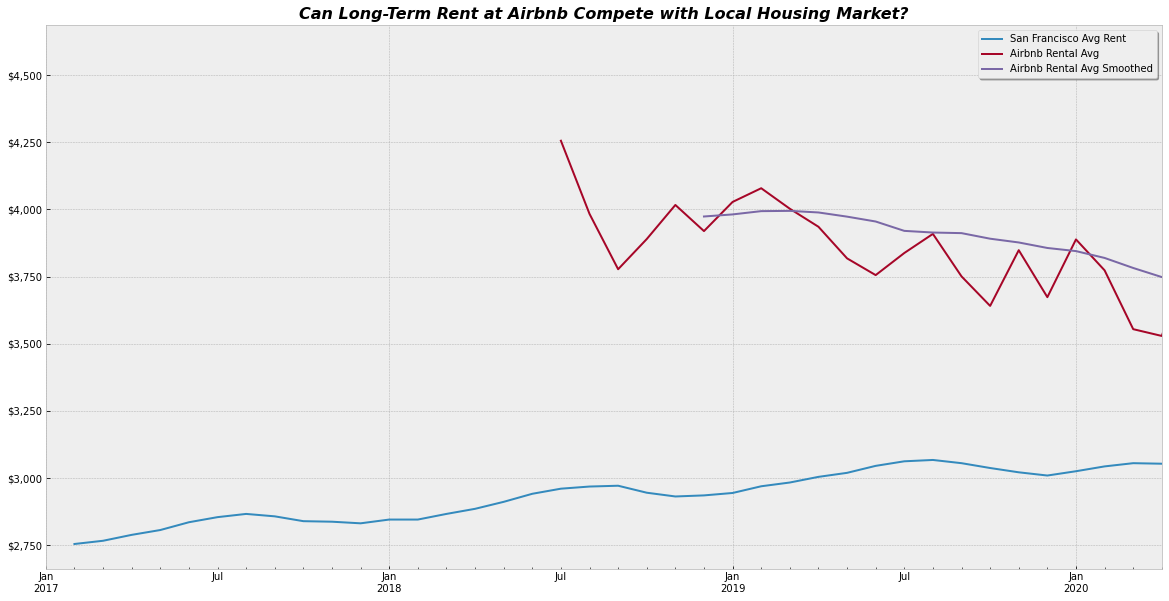

In [21]:
#Create figure
f, ax = plt.subplots(figsize = (20,10))

#Plot sf rental data
sf_rent.iloc[sf_rent.index > '2017-01-01'].plot(ax = ax, label = 'SF AVG Rent')

#Plot Airbnb data
time_series['mean'].iloc[time_series.index > '2017-01-01'].plot(ax = ax, label = 'Airbnb Avg Rent')
time_series.iloc[time_series.index > '2016-01-01']['mean'].rolling(12,6).mean().plot(ax = ax, label = 'SF AVG Rent')

###Set plot aesthetics###
#Title
ax.set_title('Can Long-Term Rent at Airbnb Compete with Local Housing Market?', fontweight = 'semibold', style = 'italic',fontsize = 16)

#Axes
ax.set_xlabel('')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

#Set xlim
ax.set_xlim('2017-01-01', '2020-04-01')

#Legend
ax.legend(['San Francisco Avg Rent', 'Airbnb Rental Avg', 'Airbnb Rental Avg Smoothed'],shadow = True, fontsize = 10);

#Save to Visualizations file
plt.savefig(eda_path + '/rent_comaprison.png', bbox_inches='tight')

Trends do seem to indicate that maybe one day Airbnb will be able to compete.